# Simulating Networks

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
#to handle stats error in learning step
from statistics import mode
from statistics import StatisticsError

## Agent-Based Models

In [4]:
G = nx.karate_club_graph()

In [5]:
def get_random_belief_bit (p):
    """Return a 1 with probability p and a 0 with probability (p - 1).
    
    # Params
    p: The probability of returning a 1

    # Return value
    1 with probability p, 0 otherwise.
    """
    
    val = np.random.uniform(low=0, high=1, size = 1)
    
    if val < p:
        x = 1
    else: 
        x = 0
    return x

In [6]:
#get_random_belief_bit (.5)

In [7]:
def get_random_belief (p1):
    """Get a random belief for a single agent.
    
    # Params
    p1: A list of numbers between 0 and 1. Each element of p1 represents the probability the 
    corresponding element of the belief list should be 1.
    
    # Return
    A list of length len(p1), with each element equal to 0 or 1.
    """
    
    list_bits = []

    for p in p1:
        bit = get_random_belief_bit(p)
        list_bits.append(bit)
    return list_bits

In [8]:
#get_random_belief (p1 = [0, 0.5, 1])

In [9]:
def initial_beliefs(G, p1):
    
    """Generate an initial beliefs for each node in G.
    The number of bits is determined by len(p1). If there are 5 bits, p1 should have 5 elements.

    # Params
    G: A graph
    p1: an array of real numbers between 0 and 1. p1[i] is the probability that bit i of the belief is 1.

    # Return
    A dict mapping nodes in G to lists of length len(p1).
    """
    beliefs = {}
    for v in G.nodes():
        l_beliefs = []
        list_bits = get_random_belief (p1) 
        l_beliefs = list_bits
        beliefs[v] = l_beliefs
    return beliefs

In [10]:
#initial_beliefs(G, p1 = [0, 0.5, 1])

In [11]:
def find_neighbor_bit_mode(G, v, beliefs, bit):
    '''
    The spec should be almost the same, but should be replaced with a function for finding 
    the mode for a particular bit:
    Among node v and its neighbors, find the most common belief in the specified bit.
    
    # Params
    G: a Graph
    v: a node in G
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    bit: An integer >= 0 corresponding an index of the belief lists.
    
    # Return value
    The most common belief (at the specified bit) among v and its neighbors or beliefs[v][bit] if there is a tie.
    '''
    #for test
    neighbors_bit_value = []
    #include bit value of v in mode calculation
    node_belief = beliefs[v]
    try:
        neighbors_bit_value.append(node_belief[bit])
    except TypeError:
        print(node_belief)
    for w in G.neighbors(v):
        neighbors_bit_value.append(beliefs[w][bit])
        try:
            popular_val = mode(neighbors_bit_value)
        except StatisticsError: 
            popular_val = beliefs[v][bit]
    return popular_val

In [12]:
#find_neighbor_bit_mode(G, v = 0, beliefs = initial_beliefs(G, p1 = [.0,1, 0.2]), bit = 2)

In [13]:
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors' beliefs
    # Params
    G: a Graph
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    
    # Return value
    Dict of new beliefs for v
    '''
    new_beliefs = {}
    for v in G.nodes():
        num_beliefs = []
        #call function 
        for bit in range(len(beliefs[v])):
            new_belief = find_neighbor_bit_mode(G, v, beliefs, bit)
            num_beliefs.append(new_belief)
            #print(num_beliefs)
        new_beliefs[v] = num_beliefs
    return new_beliefs

In [14]:
#learning_step(G, initial_beliefs(G, p1 = [.532006, .45991, .501, 0.7, 0.4]))

In [15]:
def get_belief_bit_fraction(G, beliefs, bit):

    '''Get the fraction of nodes that have 1 in given bit
    Params 
    G: graph
    beliefs: set of beliefs for each node
    bit = given index
    returns fraction of nodes that have a 1 in that given bit. 
    '''
    #fraction of nodes with 1 in given bit
    
    node_bit_value = []
    for v in G.node():
        node_bit_value.append(beliefs[v][bit]) 
        #print(beliefs, beliefs[v][bit])
    #print(node_bit_value)
    frac_nodes_one = sum(node_bit_value) / len(node_bit_value)
    return frac_nodes_one

In [16]:
#get_belief_bit_fraction(G, beliefs = initial_beliefs(G, p1 = [.4732006, .45991]), bit = 0)
#how do i let it know that it is several bits? 

In [17]:
def plot_beliefs(G, ini_beliefs, steps=10):
    '''Plots the change of beliefs over time
    Params
    G: a graph
    initial_beliefs: initial beliefs of each node
    bit: iterates through the list of bits of each node
    steps: number of runs
    
    returns plot of the fraction of nodes that have a one in a given bit  
    '''
    
    current_beliefs = dict(ini_beliefs) # variable in the argument
    beliefs = [current_beliefs]  
    
    nodes = list(current_beliefs.keys())
    num_bit = len(current_beliefs[nodes[0]])
    
    x = dict((v, list()) for v in G.nodes())
    y = dict((bit, list()) for bit in range(num_bit))
    
    #update the belief after each step
    for i in range(steps + 1):
        for bit in range(num_bit):
            bit_avg = get_belief_bit_fraction(G, current_beliefs, bit) 
            y[bit].append(bit_avg) 
        #print(y)
        if i < steps: 
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs) 
        
    #plot the fract of nodes in bit that have a one
    for bit in y:
        plt.plot(y[bit], '-', alpha=0.4, linewidth=2, label  = str(bit))

    #add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    #plt.xlim([0, steps]) 
    #plt.ylim([0, 1])
    plt.legend()

In [18]:
#mode([(1,2), (1,2), (2,1)])

In [36]:
def plot_noisy_beliefs(G, beliefs, true_value, std = 0.15, steps = 10):
    '''Return plot with a true string 
    # Params
    G: a Graph
    Beliefs: initial beliefs of each node. len(beliefs) is the
    number of bits
    True_value: the true string of bits
    Std: noise for each bit, a single error probability

    # Return value
    Plot fraction of nodes that have the same string of the
    true value
    '''
    
    current_beliefs = dict(beliefs) # variable in the argument
    beliefs = [current_beliefs]  

    #i do not need this. just care about the whole string
    #num_bit = len(current_beliefs[nodes[0]]) 
    
    x = dict((v, list()) for v in G.nodes())    
    y = []
    
    #update the belief after each step
    for i in range(steps + 1):
            #need to calculate the full string
        total = 0
        for v in G.node():
            print(current_beliefs[v])
            if current_beliefs[v] == true_value:
                print ("The list are equal") 
                total += 1
            else : 
                print ("The list aren't equal")
        frac_nodes_one = (total) / (len(G))
        #append the fraction of nodes that have same string
        y.append(frac_nodes_one) 
        #print(y)
        if i < steps: 
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs) 
        
    #plot the fract of nodes in that have same string
    
    plt.plot(y, 'b-', alpha=0.4, linewidth=2)

    #add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    #plt.xlim([0, steps]) 
    #plt.ylim([0, 1])
    plt.legend()        
        

/Users/herminiobodontorres/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


[0, 0, 0]
The list aren't equal
[0, 0, 0]
The list aren't equal
[1, 1, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[1, 1, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 0, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 0, 0]
The list aren't equal
[0, 0, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[0, 0, 0]
The list aren't equal
[0, 0, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[1, 1, 0]
The list aren't equal
[1, 1, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[1, 0, 0]
The list aren't equal
[0, 0, 0]
The list aren't equal
[1, 0, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[1, 0, 0]
The list aren't equal
[0, 1, 0]
The list are equal
[0, 1, 0]
The list are equal
[0, 0, 0]
The list aren't equal
[1, 1, 0]
The list aren't equal
[1, 0, 0]
The list aren't equal
[0, 0, 0]
The list

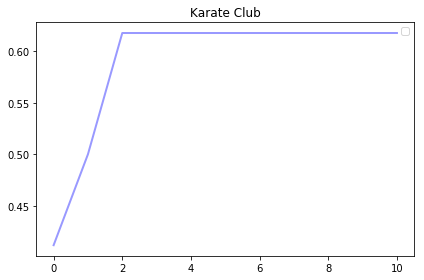

In [37]:
G = nx.karate_club_graph()
plt.title("Karate Club")
plt.subplot(1, 1, 1)
beliefs = initial_beliefs(G, p1 = [.29, .59, .09])
plot_noisy_beliefs(G, beliefs, true_value = [0, 1, 0])
plt.tight_layout()

In [26]:
def random_neighbor_bit(G, beliefs, bit):
    '''For a given bit, choose a neighboor randomly an adopt its belief
    # Params
    G: a Graph
    beliefs: a dict mapping nodes of G to lists of 1s and 0s.
    bit: An integer >= 0 corresponding an index of the belief lists.
    
    # Return value
    A belief randomly chosen among v and its neighbors or beliefs[v][bit] if there is a tie.
    '''
    import random

    #foo = ['a', 'b', 'c', 'd', 'e']
    #print(random.choice(foo))
    
    #for test
    neighbors_bit_value = []
    #include bit value of v in mode calculation
    node_belief = beliefs[v]
    try:
        neighbors_bit_value.append(node_belief[bit])
    except TypeError:
        print(node_belief)
    for w in G.neighbors(v):
        neighbors_bit_value.append(beliefs[w][bit])
        try:
            popular_val = mode(neighbors_bit_value)
        except StatisticsError: 
            popular_val = beliefs[v][bit]
    return popular_val
    
    
        new_beliefs = {}
    for v in G.nodes():
        num_beliefs = []
        #call function 
        for bit in range(len(beliefs[v])):
            new_belief = find_neighbor_bit_mode(G, v, beliefs, bit)
            num_beliefs.append(new_belief)
            #print(num_beliefs)
        new_beliefs[v] = num_beliefs
    return new_beliefs
    
    current_beliefs = dict(ini_beliefs) # variable in the argument
    beliefs = [current_beliefs]  
    
    nodes = list(current_beliefs.keys())
    num_bit = len(current_beliefs[nodes[0]])
    
    x = dict((v, list()) for v in G.nodes())
    y = dict((bit, list()) for bit in range(num_bit))
    
    #update the belief after each step
    for i in range(steps + 1):
        for bit in range(num_bit):
            bit_avg = get_belief_bit_fraction(G, current_beliefs, bit) 
            y[bit].append(bit_avg) 
    
    
    
    

In [27]:
def random_neigh_bit_list():
    '''For a given node, choose a neighboor randomly an adopt all its belief
    
    '''